In [3]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import skew

from scipy import linalg
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

In [4]:
df = pd.read_csv(r'C:\Users\User\Documents\car_price.csv',index_col = 0)
df.head()


,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [5]:
df.shape

(117927, 10)

In [6]:
df["mark"].unique()

array(['opel', 'audi', 'bmw', 'volkswagen', 'ford', 'mercedes-benz',
       'renault', 'toyota', 'skoda', 'alfa-romeo', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'kia', 'mazda', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'seat', 'volvo'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117927 non-null  object
 1   model            117927 non-null  object
 2   generation_name  87842 non-null   object
 3   year             117927 non-null  int64 
 4   mileage          117927 non-null  int64 
 5   vol_engine       117927 non-null  int64 
 6   fuel             117927 non-null  object
 7   city             117927 non-null  object
 8   province         117927 non-null  object
 9   price            117927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.9+ MB


In [8]:
df.drop("generation_name",axis=1,inplace=True)  #we drop the genration_name column because it has missing values (87842) 
                                         #compared to the others(117927)

In [9]:
df.isna().sum()  #0 na values

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [10]:
df.isnull().sum()  #0 null values

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [11]:
df.drop_duplicates(keep='first', inplace=True) #deleting duplicate rows and keeping first occurence (keep="first")

In [12]:
df.nunique()    #model and city have too many values we can get rid of them

mark             23
model           328
year             54
mileage       35394
vol_engine      508
fuel              6
city           4427
province         23
price          9310
dtype: int64

In [13]:
df["price_usd"]= df["price"] * 0.22   #changing prices from zloty(poland currency) to usd
df.drop(columns=["city","model","province","price"],axis=1,inplace =True) # not useful columns
df.head()


,mark,year,mileage,vol_engine,fuel,price_usd
0,opel,2015,139568,1248,Diesel,7898.00
1,opel,2018,31991,1499,Diesel,17270.22
2,opel,2015,278437,1598,Diesel,5940.00
3,opel,2016,47600,1248,Diesel,6776.00
4,opel,2014,103000,1400,CNG,7898.00


In [14]:
df.describe()

,year,mileage,vol_engine,price_usd
count,111166.000000,1.111660e+05,111166.000000,111166.000000
mean,2012.883606,1.418180e+05,1810.236826,15133.088496
std,5.650120,9.168686e+04,641.278088,18287.743855
min,1945.000000,0.000000e+00,0.000000,110.000000
25%,2009.000000,6.937625e+04,1461.000000,4664.000000
50%,2013.000000,1.470000e+05,1781.000000,9130.000000
75%,2017.000000,2.030000e+05,1995.000000,17798.000000
max,2022.000000,2.800000e+06,7600.000000,527978.000000


In [15]:
df.groupby(['mark'])['price_usd'].agg({'median','mean','max'})


,mean,max,median
mark,,,
alfa-romeo,14474.845481,98315.80,6072.00
audi,23186.404782,242000.00,13332.00
bmw,26660.323094,242000.00,15378.00
chevrolet,8879.079835,122078.00,5258.00
citroen,7479.919447,43538.00,5698.00
fiat,8403.225597,85789.00,6578.00
ford,11163.131443,186780.00,7480.00
honda,10477.229108,44418.00,7436.00
hyundai,11774.646431,48224.00,10098.00


DEALING WITH OUTLIERS

<AxesSubplot:>

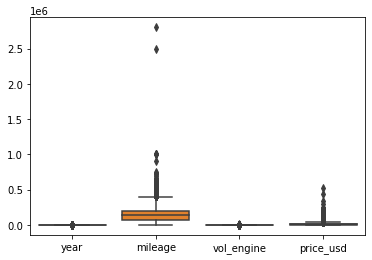

In [16]:
sns.boxplot(data=df)             #mileage and price_usd have many outliers

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

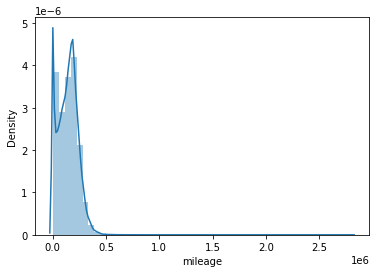

In [17]:
sns.distplot(df["mileage"])     #right skewed

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_usd', ylabel='Density'>

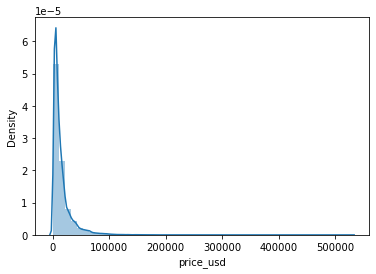

In [18]:
sns.distplot(df["price_usd"])   #right skewed

REMOVING OUTLIERS 


In [19]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)                  #because our 2 density plots are skewed we can take values between Q1-1.5*IQR and Q3+1.5*IQR
    IQR = Q3 - Q1
    
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    ls= df.index[(df[ft] < low_bound) | (df[ft]> up_bound)]
    return ls

In [20]:
index_list = []
for feature in ['price_usd','mileage']:
    index_list.extend(outliers(df,feature))
index_list

[5032,
 5825,
 5834,
 5859,
 5868,
 5869,
 5879,
 5881,
 5890,
 5891,
 5894,
 5902,
 5915,
 5917,
 5921,
 5928,
 5931,
 5941,
 8689,
 8771,
 8809,
 8818,
 8846,
 8919,
 8936,
 8948,
 8997,
 12512,
 12545,
 13752,
 13756,
 13771,
 13782,
 13784,
 13839,
 13844,
 13895,
 14037,
 14039,
 14042,
 14048,
 14049,
 14051,
 14058,
 14061,
 14065,
 14069,
 14076,
 14077,
 14080,
 14082,
 14084,
 14087,
 14088,
 14096,
 14097,
 14100,
 14101,
 14102,
 14104,
 14105,
 14108,
 14109,
 14110,
 14112,
 14117,
 14118,
 15374,
 15912,
 16148,
 16400,
 16405,
 16411,
 16413,
 16420,
 16421,
 16429,
 16430,
 16446,
 16447,
 16453,
 16457,
 16459,
 16461,
 16464,
 16467,
 16468,
 16474,
 16483,
 16485,
 16487,
 16488,
 16492,
 16500,
 16502,
 16503,
 16505,
 16508,
 16515,
 16517,
 16518,
 16519,
 16522,
 16525,
 16528,
 16529,
 16530,
 16533,
 16534,
 16535,
 16536,
 16538,
 16539,
 16540,
 16541,
 16542,
 16543,
 16569,
 16573,
 16576,
 16578,
 16579,
 16583,
 16585,
 16589,
 16590,
 16596,
 16605,
 16

In [21]:
def remove(df,ls):
    ls = sorted(set(ls))
    df=df.drop(ls)
    return df
df = remove(df,index_list)
    

<AxesSubplot:>

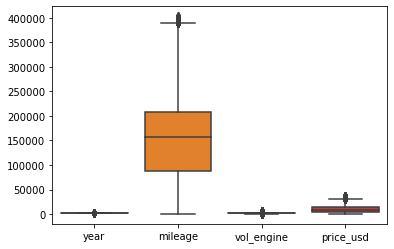

In [22]:
sns.boxplot(data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_usd', ylabel='Density'>

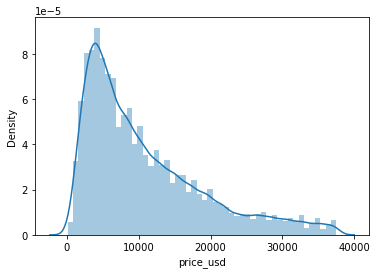

In [23]:
sns.distplot(df["price_usd"])

In [24]:
df.describe()

,year,mileage,vol_engine,price_usd
count,101271.000000,101271.000000,101271.000000,101271.000000
mean,2012.274412,150863.091803,1759.464240,10795.855055
std,5.408432,84544.504485,568.028793,8291.468564
min,1945.000000,0.000000,0.000000,110.000000
25%,2008.000000,88000.000000,1398.000000,4378.000000
50%,2012.000000,156300.000000,1598.000000,8250.000000
75%,2017.000000,208410.500000,1995.000000,14960.000000
max,2022.000000,403280.000000,6592.000000,37488.000000


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


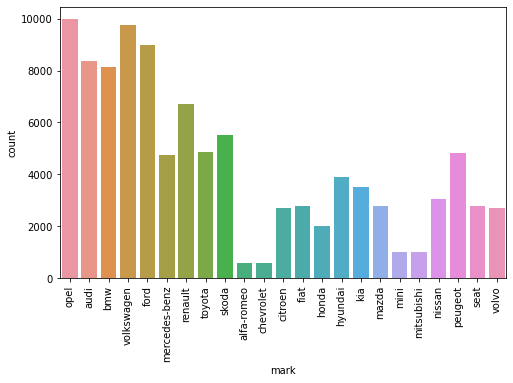

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


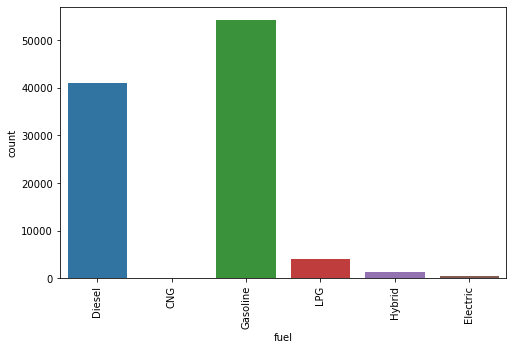

In [25]:
for column in df.columns:
    if df[column].dtype== 'object':  #top 4 cars are german cars ----> poland citizens like to drive german cars
        plt.figure(figsize=(8,5))    #most of the cars drive on gasoline and diesel
        sns.countplot(df[column])
        plt.xticks(rotation='90')
        plt.show()

Text(0.5, 1.0, 'Mark and Price')

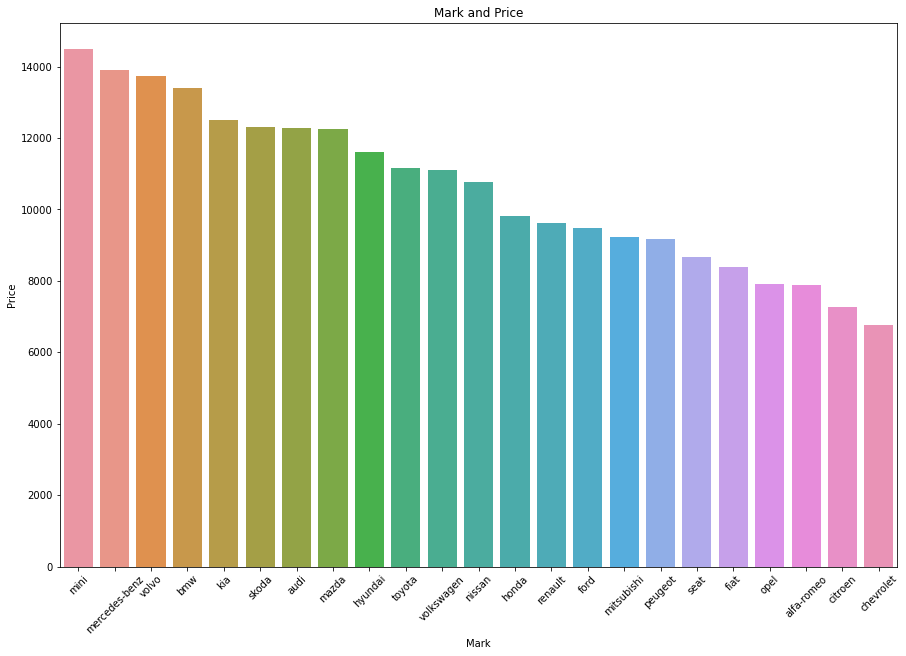

In [26]:
mark_list = list(df['mark'].unique())                  #ploting the average price of each car in descending order
mark_price = []
for i in mark_list:
    x = df[df['mark']==i]                              # 4 of the top 5 average car prices are german cars 
    price = sum(x.price_usd)/len(x)
    mark_price.append(price)
data = pd.DataFrame({'mark_list': mark_list,'mark_price':mark_price})
new_index = (data['mark_price'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['mark_list'], y=sorted_data['mark_price'])
plt.xticks(rotation= 45)
plt.xlabel('Mark')
plt.ylabel('Price')
plt.title('Mark and Price')

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'mileage'}>],
       [<AxesSubplot:title={'center':'vol_engine'}>,
        <AxesSubplot:title={'center':'price_usd'}>]], dtype=object)

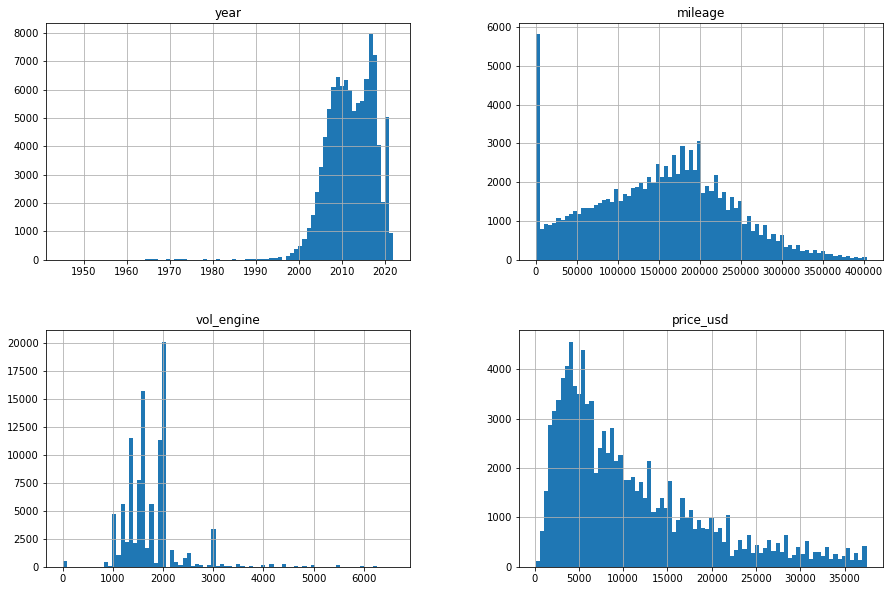

In [27]:
df.hist(bins=80, figsize=(15, 10))
#price_usd is right skewed
#Year is left skewed and has outilers on lower side
#Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. Need to check further.

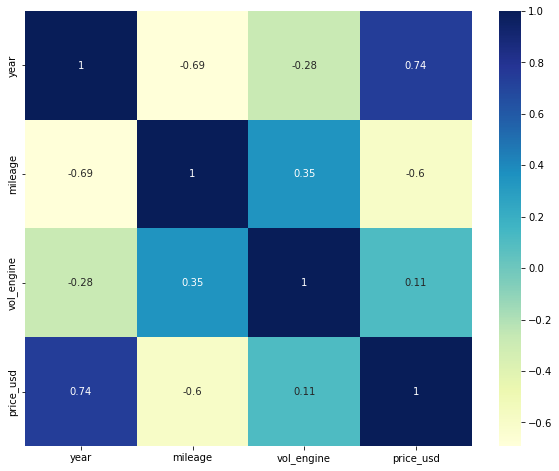

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True ,cmap="YlGnBu" )  
plt.show()
#Price is positively correlated with year and negatively correlated with mileage,vol_engine doesnt impact the price
#Miliage and year are negatively correlated

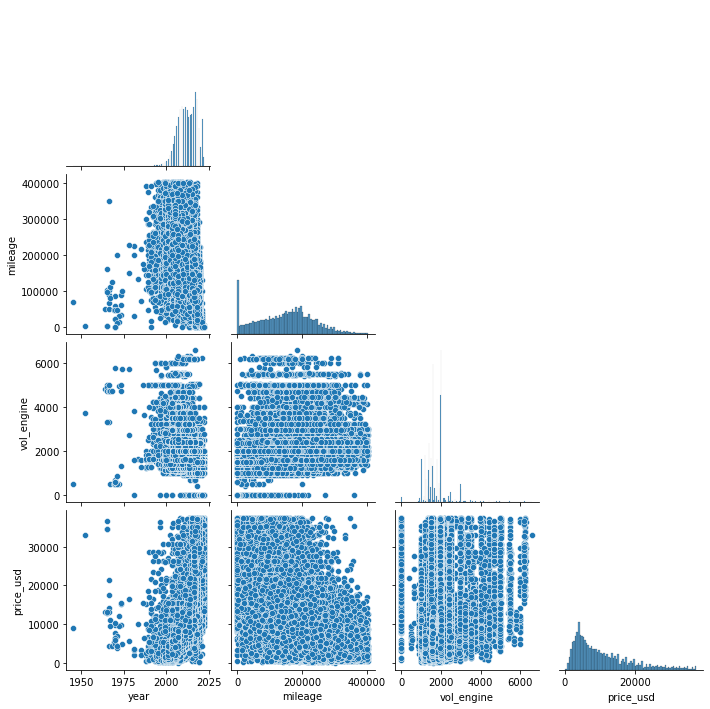

In [29]:
sns.pairplot(data=df , corner=True)
plt.show()          
#Same observation about correlation as seen in heatmap

<AxesSubplot:title={'center':'Price based on manufacturing Year of model'}, xlabel='year', ylabel='price_usd'>

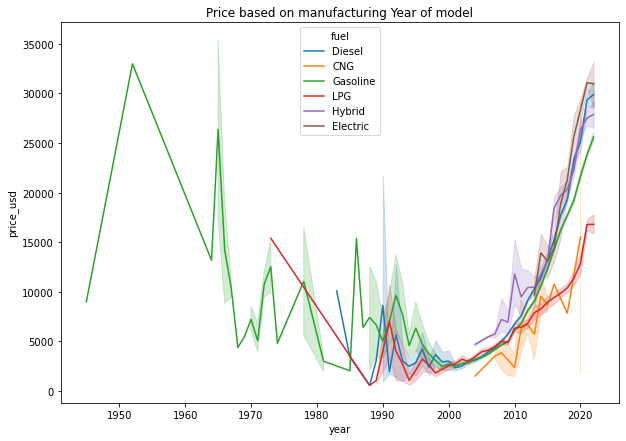

In [30]:
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='year', y='price_usd',hue="fuel",
             data=df)

#old cars use to run on diesel

<AxesSubplot:title={'center':'Price Vs Mileage'}, xlabel='mileage', ylabel='price_usd'>

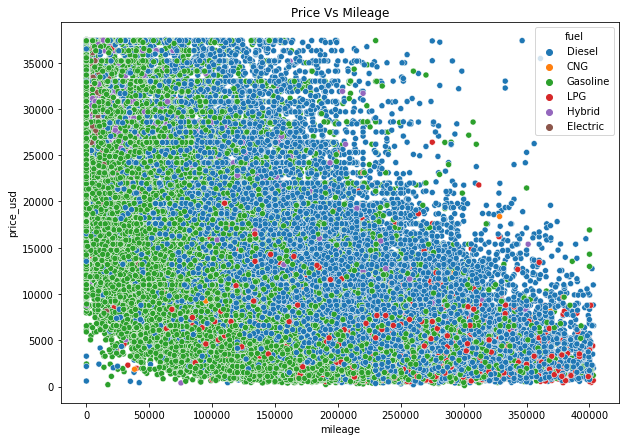

In [31]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='price_usd', x='mileage', hue='fuel', data=df)

In [32]:
df.describe()

,year,mileage,vol_engine,price_usd
count,101271.000000,101271.000000,101271.000000,101271.000000
mean,2012.274412,150863.091803,1759.464240,10795.855055
std,5.408432,84544.504485,568.028793,8291.468564
min,1945.000000,0.000000,0.000000,110.000000
25%,2008.000000,88000.000000,1398.000000,4378.000000
50%,2012.000000,156300.000000,1598.000000,8250.000000
75%,2017.000000,208410.500000,1995.000000,14960.000000
max,2022.000000,403280.000000,6592.000000,37488.000000


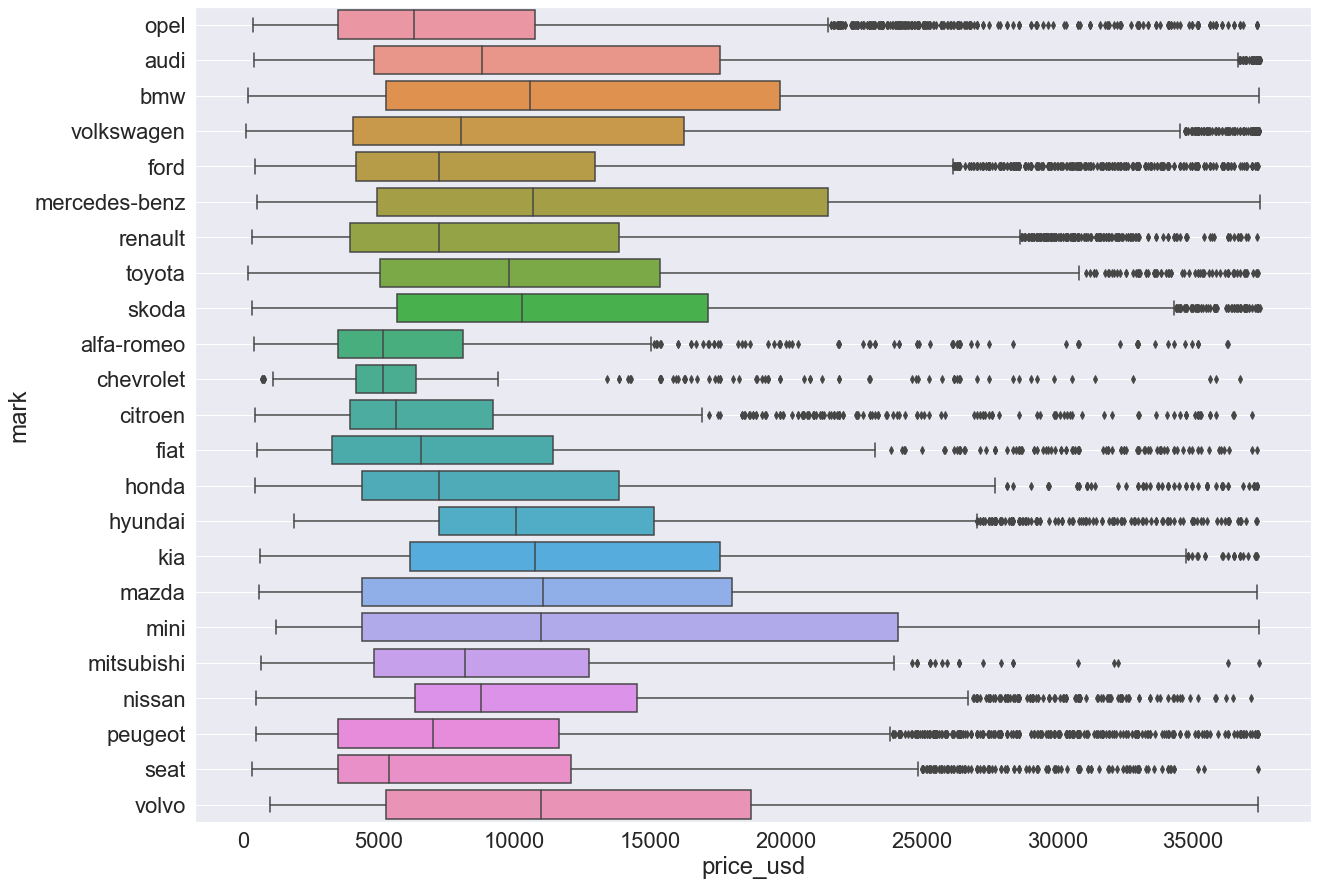

In [33]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='price_usd', y='mark', data=df)
plt.grid()

#These are not outliers 

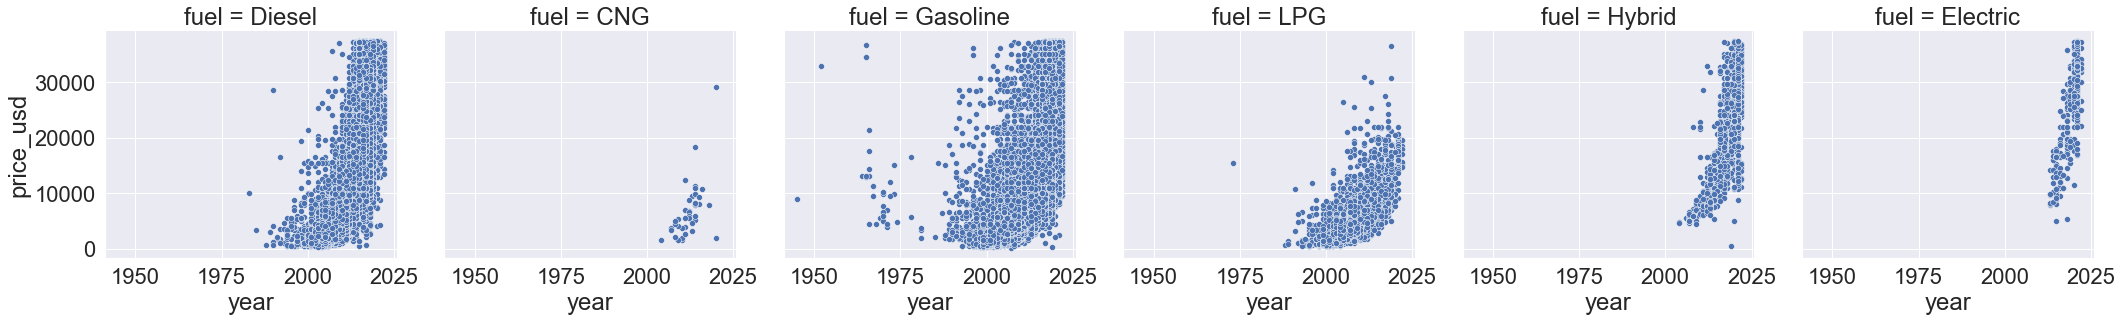

In [34]:
sns.relplot(data=df, y='price_usd',x='year',col='fuel',aspect=1,height=5)

In [35]:
df.year.value_counts().sort_values(ascending =False)

2017    7952
2018    7238
2009    6456
2016    6368
2011    6339
2010    6130
2008    6096
2012    6004
2015    5608
2014    5513
2007    5313
2013    5240
2021    5029
2006    4346
2019    4033
2005    3252
2004    2393
2020    2048
2003    1585
2002    1113
2022     943
2001     710
2000     465
1999     374
1998     244
1997     136
1996      86
1995      56
1994      47
1993      29
1992      24
1991      24
1990      17
1989      10
1970       8
1988       6
1966       5
1965       5
1971       3
1981       3
1973       3
1978       2
1985       2
1972       2
1967       2
1952       1
1964       1
1983       1
1968       1
1987       1
1986       1
1974       1
1945       1
1969       1
Name: year, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


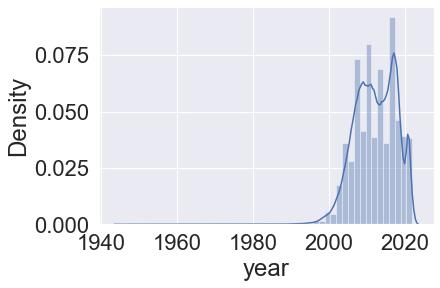

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


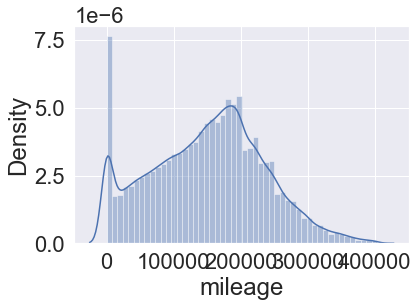

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


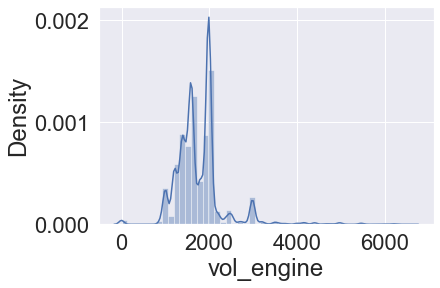

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


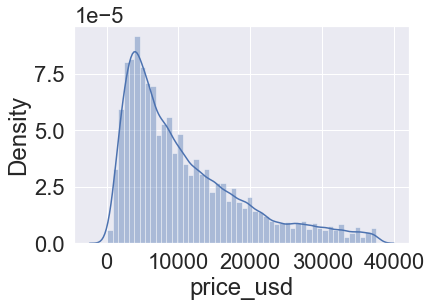

In [36]:
# check distrubution if skewed. If distrubution is skewed , its better to use log
cols_to_log = df.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(df[colname], kde=True)
    plt.show()

In [37]:
#sns.distplot(np.log(df["mileage"]), kde=True)
#plt.show()

In [38]:
# def Perform_log_transform(df,col_log):
#     """#Perform Log Transformation of dataframe , and list of columns """
#     for colname in col_log:
#         df[colname + '_log'] = np.log(df[colname])
#     #df.drop(col_log, axis=1, inplace=True)
#     df.info()

In [39]:
# Perform_log_transform(df,['mileage','price_usd','year'])

In [40]:
# df.drop(["fuel","vol_engine"],axis=1,inplace=True)
# #df.drop("price_usd",axis=1,inplace=True)

In [41]:
df.drop("mark",axis=1,inplace=True)
df.head()

,year,mileage,vol_engine,fuel,price_usd
0,2015,139568,1248,Diesel,7898.00
1,2018,31991,1499,Diesel,17270.22
2,2015,278437,1598,Diesel,5940.00
3,2016,47600,1248,Diesel,6776.00
4,2014,103000,1400,CNG,7898.00


In [42]:
# X = df.drop(["price_usd", "price_usd_log"], axis=1)
# y = df[["price_usd_log", "price_usd"]]

In [43]:
# def encode_cat_vars(x):
#     x = pd.get_dummies(
#         x,
#         columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
#         drop_first=True,
#     )
#     return x

In [44]:
# #Dummy variable creation is done before spliting the data , so all the different categories are covered
# #create dummy variable
# X = encode_cat_vars(X)
# X.head()

In [45]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train.reset_index()
# print("X_train:",X_train.shape)
# print("X_test:",X_test.shape)
# print("y_train:",y_train.shape)
# print("y_test:",y_test.shape)

In [46]:
# import statsmodels.api as sm
# # Statsmodel api does not add a constant by default. We need to add it explicitly.
# X_train = sm.add_constant(X_train)
# # Add constant to test data
# X_test = sm.add_constant(X_test)


# def build_ols_model(train):
#     # Create the model
#     olsmodel = sm.OLS(y_train["price_usd_log"], train)
#     return olsmodel.fit()

In [47]:
# olsmodel1 = build_ols_model(X_train)
# print(olsmodel1.summary())

In [48]:
df_model = pd.get_dummies(df["fuel"],drop_first=True)

In [49]:
dff=pd.concat([df,df_model],axis=1)
del dff["fuel"]
dff.head()
dff["log_price"] = np.log(df["price_usd"])

dff.head()


,year,mileage,vol_engine,price_usd,Diesel,Electric,Gasoline,Hybrid,LPG,log_price
0,2015,139568,1248,7898.00,1,0,0,0,0,8.974365
1,2018,31991,1499,17270.22,1,0,0,0,0,9.756739
2,2015,278437,1598,5940.00,1,0,0,0,0,8.689464
3,2016,47600,1248,6776.00,1,0,0,0,0,8.821142
4,2014,103000,1400,7898.00,0,0,0,0,0,8.974365


In [50]:

x = dff.drop( ["log_price","price_usd"], axis=1)
y = dff["log_price"]

In [51]:

x

,year,mileage,vol_engine,Diesel,Electric,Gasoline,Hybrid,LPG
0,2015,139568,1248,1,0,0,0,0
1,2018,31991,1499,1,0,0,0,0
2,2015,278437,1598,1,0,0,0,0
3,2016,47600,1248,1,0,0,0,0
4,2014,103000,1400,0,0,0,0,0
...,...,...,...,...,...,...,...,...
117247,2018,53500,1969,0,0,1,0,0
117251,2016,83500,1969,0,0,1,0,0
117252,2017,174000,1969,1,0,0,0,0
117253,2016,189020,1969,0,0,1,0,0


In [52]:
import statsmodels.api as sm
x= sm.add_constant(x)
y= dff["log_price"]

In [53]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
dff.head()

,year,mileage,vol_engine,price_usd,Diesel,Electric,Gasoline,Hybrid,LPG,log_price
0,2015,139568,1248,7898.00,1,0,0,0,0,8.974365
1,2018,31991,1499,17270.22,1,0,0,0,0,9.756739
2,2015,278437,1598,5940.00,1,0,0,0,0,8.689464
3,2016,47600,1248,6776.00,1,0,0,0,0,8.821142
4,2014,103000,1400,7898.00,0,0,0,0,0,8.974365


In [54]:
model = sm.OLS(y,x).fit()  
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 5.662e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:58:02   Log-Likelihood:                -37545.
No. Observations:              101271   AIC:                         7.511e+04
Df Residuals:                  101262   BIC:                         7.519e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -237.7155      0.626   -380.040      0.000    -238.941    -236.490
year           0.1221      0.000    396.323      0.000       0.122       0.123
mileage    -1.665e-06   2.13e-08    -78.234      0.000   -1.71e-06   -1.62e-06
vol_engine     0.0006   2.14e-06    275.132      0.000       0.001       0.001
Diesel         0.1742      0.054      3.218      0.001       0.068       0.280
Electric       1.2324      0.057     21.731      0.000       1.121       1.344
Gasoline       0.1507      0.054      2.783      0.005       0.045       0.257
Hybrid         0.1915      0.055      3.487      0.000       0.084       0.299
LPG            0.0821      0.054      1.510      0.131      -0.024       0.189
==============================================================================
Omnibus:                    39584.582   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2240501.850
Skew:                           1.091   Prob(JB):                         0.00
Kurtosis:                      25.939   Cond. No.                     9.82e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.82e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

.Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in price of used cars for upto 89%

.The model is not an underfitting or overfitting model.

.To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.

.Before we move on to assumption testing, we'll do a quick performance check on the test data.

In [55]:
#removing columns with p-value>0.05    we will remove LPG
dff.drop("LPG",axis=1,inplace=True)

In [56]:

x = dff.drop( ["log_price","price_usd"], axis=1)
y = dff["log_price"]

In [57]:
import statsmodels.api as sm
x= sm.add_constant(x)
y= dff["log_price"]

In [58]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
dff.head()

,year,mileage,vol_engine,price_usd,Diesel,Electric,Gasoline,Hybrid,log_price
0,2015,139568,1248,7898.00,1,0,0,0,8.974365
1,2018,31991,1499,17270.22,1,0,0,0,9.756739
2,2015,278437,1598,5940.00,1,0,0,0,8.689464
3,2016,47600,1248,6776.00,1,0,0,0,8.821142
4,2014,103000,1400,7898.00,0,0,0,0,8.974365


In [59]:
model = sm.OLS(y,x).fit()  
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 6.470e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:58:02   Log-Likelihood:                -37546.
No. Observations:              101271   AIC:                         7.511e+04
Df Residuals:                  101263   BIC:                         7.518e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -237.6240      0.623   -381.687      0.000    -238.844    -236.404
year           0.1221      0.000    396.328      0.000       0.122       0.123
mileage    -1.665e-06   2.13e-08    -78.246      0.000   -1.71e-06   -1.62e-06
vol_engine     0.0006   2.14e-06    275.161      0.000       0.001       0.001
Diesel         0.0929      0.006     15.972      0.000       0.082       0.104
Electric       1.1512      0.018     63.938      0.000       1.116       1.186
Gasoline       0.0694      0.006     11.989      0.000       0.058       0.081
Hybrid         0.1103      0.011     10.007      0.000       0.089       0.132
==============================================================================
Omnibus:                    39571.094   Durbin-Watson:                   1.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2240095.868
Skew:                           1.090   Prob(JB):                         0.00
Kurtosis:                      25.937   Cond. No.                     9.77e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
dff.head()

,year,mileage,vol_engine,price_usd,Diesel,Electric,Gasoline,Hybrid,log_price
0,2015,139568,1248,7898.00,1,0,0,0,8.974365
1,2018,31991,1499,17270.22,1,0,0,0,9.756739
2,2015,278437,1598,5940.00,1,0,0,0,8.689464
3,2016,47600,1248,6776.00,1,0,0,0,8.821142
4,2014,103000,1400,7898.00,0,0,0,0,8.974365


In [61]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  
y_pred= regressor.predict(x_train) 

In [62]:
#Model accuracy
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test)) 
#The accuracy score represents the the coefficient of determination(R square).R square is measure of how close the data are to the fitted regression line.

#The root mean squared error
print("The RMSE on the training data set :",np.sqrt(mean_squared_error(y_train,y_pred)))
print("The RMSE on the testing data set :",np.sqrt(mean_squared_error(y_test,regressor.predict(x_test))))
#The RMSE is the standart deviation of the residuals.Residuals is the difference between the predicted values and the regression line


#The mean absolute error
print("The MAE on the training data set :",np.sqrt(mean_absolute_error(y_train,y_pred)))
print("The MAE on the testing data set :",np.sqrt(mean_absolute_error(y_test,regressor.predict(x_test))))
#The mean absolute value is the average of all absolute errors.The absolute error is the difference between the true value (y_train) and the predicted value(y_pred)

print("Intercept",regressor.intercept_)
#The intercept is the expected mean value of Y when all X=0

print("Coefficient",regressor.coef_)
#Coefficients are the weight


Train Score:  0.8152316757444624
Test Score:  0.825187353770565
The RMSE on the training data set : 0.35223194460602936
The RMSE on the testing data set : 0.3440306672866015
The MAE on the training data set : 0.5065903782682014
The MAE on the testing data set : 0.5064482025847971
Intercept -235.14584166079558
Coefficient [ 0.00000000e+00  1.20893469e-01 -1.73665854e-06  5.92442571e-04
  9.11167395e-02  1.15254368e+00  6.41545285e-02  1.04471354e-01]


Root Mean Squared Error of train and test data is not different, indicating that our model is not overfitting the train data.


Test Assumptions

Checking the Linear Regression Assumption:
   1) No Multicollinearity  
   2) Mean of residuals should be 0  
   3) No Heteroscedasticity  
   4) Linearity of variables  
   5) Normality of error terms

Checking Assumption 1: No Multicollinearity
We will use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [64]:
print(checking_vif(x_train))

      feature            VIF
0       const  317778.602745
1        year       2.285851
2     mileage       2.662739
3  vol_engine       1.224112
4      Diesel       6.721771
5    Electric       1.162779
6    Gasoline       6.866627
7      Hybrid       1.369025


We have removed multicollinearity from the data now.Some Fuel variables are showing  vif > 5 because most cars are either diesel and gasoline. These two features are correlated with each other.

We will not drop this variable from the model because this will not affect the interpretation of other features in the model.

Checking Assumption 2: Mean of residuals should be 0

In [65]:
residuals = model.resid
np.mean(residuals)   #Its 0

-9.258445833318894e-13

Checking Assumption 3: No Heteroscedasticity

.Homoscedacity - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

.Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

In [66]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, x)
lzip(name, test)
#Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic.

[('F statistic', 0.7675207269268047), ('p-value', 0.9999999999999999)]

Checking Assumption 4: Linearity of variables
Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x axis.

In [ ]:
dff.head()

In [69]:
/# df.drop("vol_engine",axis=1,inplace=True)
# df.drop("fuel",axis=1,inplace=True)

Multicollinearity  

In [70]:
/#The dependent variable should have a strong relationship with independent variables.
#However, any independent variables should not have strong correlations among other independant variables

df.corr().style.background_gradient(cmap='coolwarm')    
#we have a strong negative relationship between mileage and year (-0.69) wich are both independant variables in our model ,but we will stick with them bcz of other satisfied statistical tests that we will se later 

,year,mileage,vol_engine,price_usd
year,1.000000,-0.691391,-0.281072,0.736598
mileage,-0.691391,1.000000,0.350002,-0.597390
vol_engine,-0.281072,0.350002,1.000000,0.109481
price_usd,0.736598,-0.597390,0.109481,1.000000


In [71]:
df.head()


,year,mileage,vol_engine,fuel,price_usd
0,2015,139568,1248,Diesel,7898.00
1,2018,31991,1499,Diesel,17270.22
2,2015,278437,1598,Diesel,5940.00
3,2016,47600,1248,Diesel,6776.00
4,2014,103000,1400,CNG,7898.00


In [72]:
x = df.drop(["price_usd","mark"],axis=1)
y= df["price_usd"]

KeyError: "['mark'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  
y_pred= regressor.predict(x_train) 

In [ ]:
#Model accuracy
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test)) 
#The accuracy score represents the the coefficient of determination(R square).R square is measure of how close the data are to the fitted regression line.

#The root mean squared error
print("The RMSE on the training data set :",np.sqrt(mean_squared_error(y_train,y_pred)))
print("The RMSE on the testing data set :",np.sqrt(mean_squared_error(y_test,regressor.predict(x_test))))
#The RMSE is the standart deviation of the residuals.Residuals is the difference between the predicted values and the regression line


#The mean absolute error
print("The MAE on the training data set :",np.sqrt(mean_absolute_error(y_train,y_pred)))
print("The MAE on the testing data set :",np.sqrt(mean_absolute_error(y_test,regressor.predict(x_test))))
#The mean absolute value is the average of all absolute errors.The absolute error is the difference between the true value (y_train) and the predicted value(y_pred)

print("Intercept",regressor.intercept_)
#The intercept is the expected mean value of Y when all X=0

print("Coefficient",regressor.coef_)
#Coefficients are the weight


In [ ]:
regressor.predict([[2015,140000]])

In [ ]:
y_hat = regressor.predict(x_train)

In [ ]:
plt.scatter(y_train,y_hat)
plt.show()                        #not the best results
                                  #we dont have a good match betweeen targets and predictions

In [ ]:
sns.distplot(y_train - y_hat)   #residual plot = difference between the targets and the predictions

In [ ]:
#Another way of checking how good our model is ,is by using the ordinary least square method in statsmodels
import statsmodels.api as sm
x = sm.add_constant(x)
y= df["price_usd"]


In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [ ]:
model = sm.OLS(y_train,x_train).fit()  #the standart error of the independant variables(year,mileage) isnt too big + the p-value<0,05
model.summary()   
#R-squarred = 0.55 our accuracy is not that good we can try to improve it by adding more variables

In [ ]:
df_model = pd.get_dummies(df["mark"],drop_first=True)  #we want to check if we can get higher accuracy by adding more variables,we will use dummies to change the categorical column to numerical

In [ ]:
#df2 is our second model 
df2=pd.concat([df,df_model],axis=1)
del df2["mark"]
df2.head()


In [ ]:
df2.columns

In [ ]:
import statsmodels.api as sm
corr=df2.corr()
sm.graphics.plot_corr(corr,xnames=list(corr.columns))
plt.show()     #it doesnt seem that our  independant variables are correlated 

In [ ]:
x2 = df2.drop("price_usd",axis=1)
y2= df2["price_usd"]

In [ ]:
# #doing the same as before but  with more independant variables
# from sklearn.model_selection import train_test_split  
# x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.2, random_state=0)  
# from sklearn.linear_model import LinearRegression  
# regressor= LinearRegression()  
# regressor.fit(x2_train, y2_train)  
# y2_pred= regressor.predict(x2_test) 
# print('Train Score: ', regressor.score(x2_train, y2_train))  
# print('Test Score: ', regressor.score(x2_test, y2_test))  
# from sklearn.metrics import r2_score
# score = r2_score(y2_test,y2_pred)
# score
# #we got a higher accuracy

In [ ]:
import statsmodels.api as sm
x2 = sm.add_constant(x2)
y2= df2["price_usd"]


In [ ]:
from sklearn.model_selection import train_test_split  
x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.2, random_state=0) 

In [ ]:
model = sm.OLS(y2,x2).fit()
model.summary()

In [ ]:
#we can remove columns with p value > 0.05 like ford,kia,nissan,skoda,toyota

In [ ]:
df2.drop(["ford","kia","nissan","skoda","toyota"],axis=1,inplace=True) #in df3 we removed the cars with p > 0.05


In [ ]:
len(df2.columns)

In [ ]:
x3 = df2.drop("price_usd",axis=1)
y3= df2["price_usd"]

In [ ]:
import statsmodels.api as sm
x3 = sm.add_constant(x3)
y3= df2["price_usd"]


In [ ]:
from sklearn.model_selection import train_test_split  
x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.2, random_state=0) 

model3 = sm.OLS(y3,x3).fit()
model3.summary()                      #no more p-values > 0.05 ====> no more collinearity between independant variables

In [ ]:
 
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x3_train, y3_train)  
y3_pred= regressor.predict(x3_train) 


In [ ]:
y3_hat = regressor.predict(x3_train)

In [ ]:
sns.distplot(y3_train - y3_hat)   # This residual plot is more bell shaped than the first one

In [ ]:
df2.corr().style.background_gradient(cmap='coolwarm')     #we dont have any multicollinearity

In [ ]:
df3.columns